<a href="https://colab.research.google.com/github/Irenee123/linear_regression_model/blob/main/Lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Prepare the Dataset

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Lung Cancer Dataset.csv')

# Preprocessing
# Convert 'YES'/'NO' to 1/0 for the target variable
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Features (X) and target (y)
X = df.drop('PULMONARY_DISEASE', axis=1)  # All columns except the target
y = df['PULMONARY_DISEASE']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4000, 17)
Testing data shape: (1000, 17)


 Train and Compare Models

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('Lung Cancer Dataset.csv')

# Preprocessing
# Convert 'YES'/'NO' to 1/0 for the target variable
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Remove rows with NaN in 'PULMONARY_DISEASE' column before splitting
data = data.dropna(subset=['PULMONARY_DISEASE'])  # Changed df to data

# Features (X) and target (y) after removing NaNs
X = data.drop('PULMONARY_DISEASE', axis=1)  # Changed df to data
y = data['PULMONARY_DISEASE']  # Changed df to data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression with Gradient Descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train)

# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predictions
y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)

y_train_pred_tree = tree_reg.predict(X_train)
y_test_pred_tree = tree_reg.predict(X_test)

y_train_pred_forest = forest_reg.predict(X_train)
y_test_pred_forest = forest_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)

train_mse_tree = mean_squared_error(y_train, y_train_pred_tree)
test_mse_tree = mean_squared_error(y_test, y_test_pred_tree)

train_mse_forest = mean_squared_error(y_train, y_train_pred_forest)
test_mse_forest = mean_squared_error(y_test, y_test_pred_forest)

# Print MSE for each model
print("Linear Regression:")
print(f"Train MSE: {train_mse_sgd}")
print(f"Test MSE: {test_mse_sgd}\n")

print("Decision Tree:")
print(f"Train MSE: {train_mse_tree}")
print(f"Test MSE: {test_mse_tree}\n")

print("Random Forest:")
print(f"Train MSE: {train_mse_forest}")
print(f"Test MSE: {test_mse_forest}\n")

Linear Regression:
Train MSE: 2.0707198465417323e+27
Test MSE: 2.1332903972178427e+27

Decision Tree:
Train MSE: 0.0
Test MSE: 0.164

Random Forest:
Train MSE: 0.012360050000000001
Test MSE: 0.08279049999999999



In [13]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.2-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - ------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


loss curve plotting

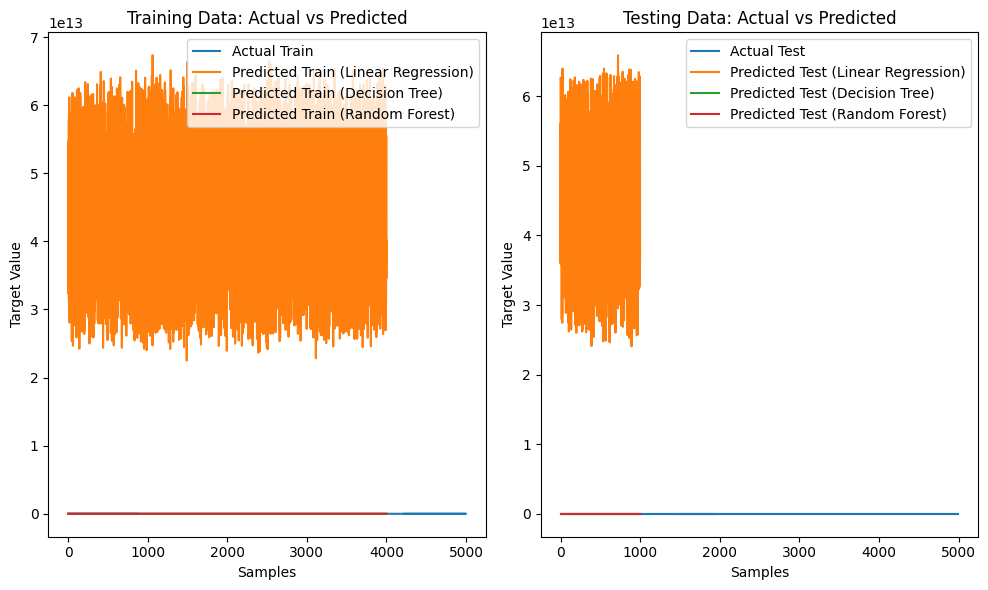

In [14]:
import matplotlib.pyplot as plt

# Plotting the loss curves
plt.figure(figsize=(10, 6))

# Training Data
plt.subplot(1, 2, 1)
plt.plot(y_train, label='Actual Train')
plt.plot(y_train_pred_sgd, label='Predicted Train (Linear Regression)')
plt.plot(y_train_pred_tree, label='Predicted Train (Decision Tree)')
plt.plot(y_train_pred_forest, label='Predicted Train (Random Forest)')
plt.legend()
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Target Value')

# Testing Data
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Actual Test')
plt.plot(y_test_pred_sgd, label='Predicted Test (Linear Regression)')
plt.plot(y_test_pred_tree, label='Predicted Test (Decision Tree)')
plt.plot(y_test_pred_forest, label='Predicted Test (Random Forest)')
plt.legend()
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Target Value')

plt.tight_layout()
plt.show()

Saving best model

In [15]:
import joblib

# Determine the best model
best_model = None
best_test_mse = min(test_mse_sgd, test_mse_tree, test_mse_forest)

if best_test_mse == test_mse_sgd:
    best_model = sgd_reg
    print("Best Model: Linear Regression")
elif best_test_mse == test_mse_tree:
    best_model = tree_reg
    print("Best Model: Decision Tree")
else:
    best_model = forest_reg
    print("Best Model: Random Forest")

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Best Model: Random Forest
Best model saved as 'best_model.pkl'


Making predictions using best model

In [16]:
import joblib
import numpy as np

# Load the saved model
def load_model(model_path='best_model.pkl'):
    """
    Load the saved model from the specified path.
    """
    try:
        model = joblib.load(model_path)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(f"Error loading the model: {e}")
        return None

# Function to make predictions
def predict_lung_cancer(model, input_data):
    """
    Make predictions using the loaded model.

    Args:
        model: The loaded machine learning model.
        input_data: A list or array of input features.

    Returns:
        prediction: The predicted value (0 or 1 for lung cancer).
    """
    try:
        # Convert input data to a numpy array and reshape it
        input_data = np.array(input_data).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)

        # Return the prediction (rounded to 0 or 1 for binary classification)
        return round(prediction[0])
    except Exception as e:
        print(f"Error making prediction: {e}")
        return None

# Example usage
if __name__ == "__main__":
    # Load the model
    model = load_model()

    # Indent the 'if model:' block correctly
    if model:
        # Example input data - Accessing values from the DataFrame
        example_input = [
            data['AGE'].iloc[0],  # Accessing the first value of 'AGE' column
            data['GENDER'].iloc[0],  # Accessing the first value of 'GENDER' column
            data['SMOKING'].iloc[0],  # Accessing the first value of 'SMOKING' column
            data['FINGER_DISCOLORATION'].iloc[0],  # Accessing the first value of 'FINGER_DISCOLORATION' column
            data['MENTAL_STRESS'].iloc[0],  # Accessing the first value of 'MENTAL_STRESS' column
            data['EXPOSURE_TO_POLLUTION'].iloc[0],  # Accessing the first value of 'EXPOSURE_TO_POLLUTION' column
            data['LONG_TERM_ILLNESS'].iloc[0],  # Accessing the first value of 'LONG_TERM_ILLNESS' column
            data['ENERGY_LEVEL'].iloc[0],  # Accessing the first value of 'ENERGY_LEVEL' column
            data['IMMUNE_WEAKNESS'].iloc[0],  # Accessing the first value of 'IMMUNE_WEAKNESS' column
            data['BREATHING_ISSUE'].iloc[0],  # Accessing the first value of 'BREATHING_ISSUE' column
            data['ALCOHOL_CONSUMPTION'].iloc[0],  # Accessing the first value of 'ALCOHOL_CONSUMPTION' column
            data['THROAT_DISCOMFORT'].iloc[0],  # Accessing the first value of 'THROAT_DISCOMFORT' column
            data['OXYGEN_SATURATION'].iloc[0],  # Accessing the first value of 'OXYGEN_SATURATION' column
            data['CHEST_TIGHTNESS'].iloc[0],  # Accessing the first value of 'CHEST_TIGHTNESS' column
            data['FAMILY_HISTORY'].iloc[0],  # Accessing the first value of 'FAMILY_HISTORY' column
            data['SMOKING_FAMILY_HISTORY'].iloc[0],  # Accessing the first value of 'SMOKING_FAMILY_HISTORY' column
            data['STRESS_IMMUNE'].iloc[0]  # Accessing the first value of 'STRESS_IMMUNE' column
        ]

        # Make prediction
        prediction = predict_lung_cancer(model, example_input)

        if prediction is not None:
            print(f"Prediction: {'Lung Cancer Detected (1)' if prediction == 1 else 'No Lung Cancer (0)'}")

Model loaded successfully!
Prediction: No Lung Cancer (0)


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Scatter Plot with Linear Regression Line

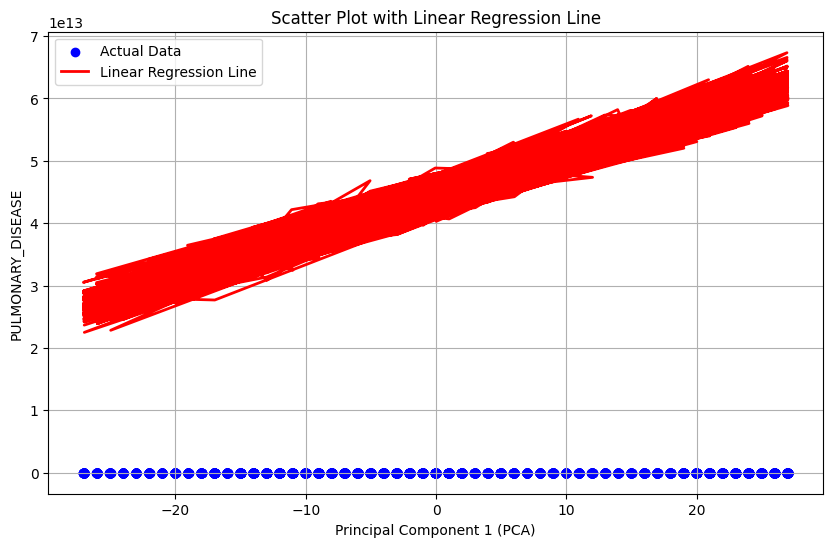

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv('Lung Cancer Dataset.csv')

# Preprocessing
# Use 'data' instead of 'df' for preprocessing
data['PULMONARY_DISEASE'] = data['PULMONARY_DISEASE'].map({'YES': 1, 'NO': 0})

# Features (X) and target (y)
# Use 'data' instead of 'df' to create X and y
X = data.drop('PULMONARY_DISEASE', axis=1)
y = data['PULMONARY_DISEASE']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train)

# Predictions
y_train_pred = sgd_reg.predict(X_train)
y_test_pred = sgd_reg.predict(X_test)

# Reduce dataset to 2D using PCA for visualization
pca = PCA(n_components=1)  # Reduce to 1D for simplicity
X_train_pca = pca.fit_transform(X_train)

# Plot the scatter plot and linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(X_train_pca, y_train, color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(X_train_pca, y_train_pred, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and legend
plt.xlabel('Principal Component 1 (PCA)')
plt.ylabel('PULMONARY_DISEASE')
plt.title('Scatter Plot with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

Visualize the linear relationship using a single feature EX: AGE.




The x-axis represents the AGE feature WHILE The y-axis represents the target variable (PULMONARY_DISEASE)

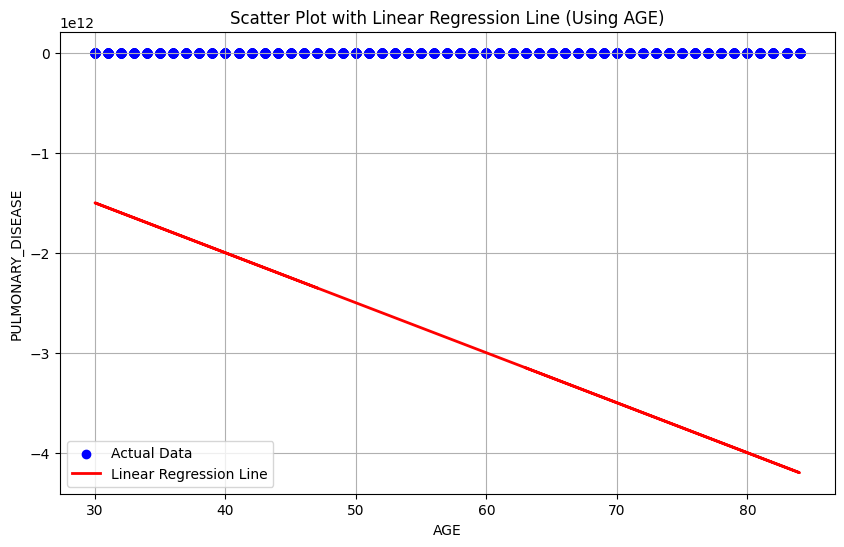

In [19]:
# Use only one feature (e.g., AGE) for visualization
X_train_age = X_train[['AGE']]

# Train Linear Regression model on a single feature
sgd_reg_age = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg_age.fit(X_train_age, y_train)

# Predictions
y_train_pred_age = sgd_reg_age.predict(X_train_age)

# Plot the scatter plot and linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data points
plt.scatter(X_train_age, y_train, color='blue', label='Actual Data')

# Plot the linear regression line
plt.plot(X_train_age, y_train_pred_age, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and legend
plt.xlabel('AGE')
plt.ylabel('PULMONARY_DISEASE')
plt.title('Scatter Plot with Linear Regression Line (Using AGE)')
plt.legend()
plt.grid(True)
plt.show()

Installing required Libraries for task 2

In [20]:
pip install fastapi pydantic uvicorn
pip freeze > requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
